# Part I: *Data Analysis and Preprocessing*

## A. Data Manipulation

#### a. Import, visualize, and save the contents of a dataset.

##### *algerian soil props*

In [1]:
import pandas as pd
import numpy as np
import io

df = pd.read_excel('../Data/soil_dz_allprops.xlsx')
df.info(show_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      295 non-null    object 
 1   sand % topsoil    295 non-null    float64
 2   sand % subsoil    295 non-null    float64
 3   silt % topsoil    295 non-null    float64
 4   silt% subsoil     295 non-null    float64
 5   clay % topsoil    295 non-null    float64
 6   clay % subsoil    295 non-null    float64
 7   pH water topsoil  295 non-null    float64
 8   pH water subsoil  295 non-null    float64
 9   OC % topsoil      295 non-null    float64
 10  OC % subsoil      295 non-null    float64
 11  N % topsoil       295 non-null    float64
 12  N % subsoil       295 non-null    float64
 13  BS % topsoil      295 non-null    float64
 14  BS % subsoil      295 non-null    float64
 15  CEC topsoil       295 non-null    float64
 16  CEC subsoil       295 non-null    float64
 1

In [2]:
pd.set_option('display.max_columns', None)
df_no_geometry = df.drop('geometry', axis=1) 
df_no_geometry.head()

,CNT_FULLNAME,sand % topsoil,sand % subsoil,silt % topsoil,silt% subsoil,clay % topsoil,clay % subsoil,pH water topsoil,pH water subsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,BS % topsoil,BS % subsoil,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
0,ALGERIA,49.57,43.09,28.200,24.200,22.230,32.710,5.86,5.39,2.4110,0.7420,0.1150,0.061,72.5,63.2,6.89,12.420,21.50,35.8,0.030,0.090,1.78,1.78,20.8,12.1
1,ALGERIA,56.97,55.06,21.440,19.190,21.690,25.680,5.92,6.02,1.0460,0.5500,0.1150,0.071,81.0,81.7,15.00,17.380,66.50,61.4,0.760,0.830,1.19,1.32,9.7,8.0
2,ALGERIA,57.39,55.21,24.315,22.825,18.295,21.965,6.27,5.75,1.2295,0.3905,0.0565,0.028,69.9,53.5,8.08,8.325,20.45,26.1,0.035,0.035,1.69,1.69,18.7,13.0
3,ALGERIA,20.41,24.08,32.930,29.190,46.620,46.690,7.86,8.03,0.6790,0.3820,0.0870,0.048,98.6,99.3,39.48,37.910,74.20,71.0,6.330,6.770,1.54,1.58,9.3,9.6
4,ALGERIA,31.42,28.46,21.650,20.520,46.890,50.950,7.32,7.49,0.6190,0.4240,0.0870,0.057,92.9,93.6,36.42,36.980,72.10,69.8,1.950,2.720,1.54,1.67,9.0,8.7


##### *wilayas' polygons data*

<Axes: >

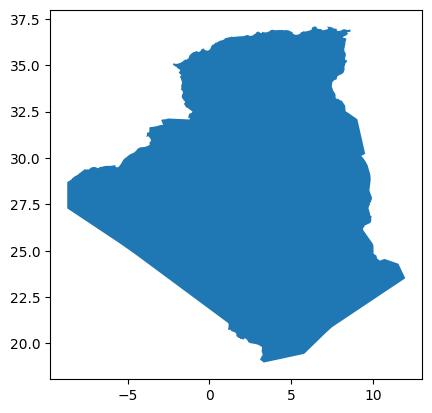

In [3]:
import geopandas as geopd

geodf = geopd.read_file(filename='../Data/dz.shp')

geodf = geodf.drop(['id', 'name'], axis=1)



geodf.head()
geo_dz = geodf['geometry'].iloc[0] 
geodf.plot()


In [4]:
from shapely import wkt

def safe_wkt_loads(wkt_str):
    try:
        return wkt.loads(wkt_str)
    except Exception as e:
        print(f"Error parsing WKT: {wkt_str} -> {e}")
        return None  # Return None for entries that fail

df['geometry'] = df['geometry'].apply(safe_wkt_loads)


df.dropna(subset=['geometry'], how='all', inplace=True)



Error parsing WKT: POLYGON ((5.980269908905029 34.56650161743164, 5.9806599617004395 34.56270980834961, 5.991310119628906 34.5434684753418, 6.001669883728027 34.49327850341797, 5.9951300621032715 34.47127151489258, 5.9852800369262695 34.43404006958008, 5.977729797363281 34.39255905151367, 5.988339900970459 34.250099182128906, 5.987060070037842 34.188560485839844, 5.983059883117676 34.18827819824219, 5.943850040435791 34.137428283691406, 5.88778018951416 34.12255859375, 5.782830238342285 34.107120513916016, 5.748340129852295 34.08375930786133, 5.702169895172119 34.02193832397461, 5.685259819030762 33.98979187011719, 5.6882100105285645 33.96617889404297, 5.7263898849487305 33.88452911376953, 5.735680103302002 33.878028869628906, 5.75629997253418 33.804901123046875, 5.777070045471191 33.768680572509766, 5.784969806671143 33.74674987792969, 5.793479919433594 33.73598098754883, 5.8030500411987305 33.685630798339844, 5.797989845275879 33.661441802978516, 5.767859935760498 33.60118865966797, 

In [5]:
df = df[df['geometry'].apply(lambda x: geo_dz.intersects(x))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      282 non-null    object 
 1   sand % topsoil    282 non-null    float64
 2   sand % subsoil    282 non-null    float64
 3   silt % topsoil    282 non-null    float64
 4   silt% subsoil     282 non-null    float64
 5   clay % topsoil    282 non-null    float64
 6   clay % subsoil    282 non-null    float64
 7   pH water topsoil  282 non-null    float64
 8   pH water subsoil  282 non-null    float64
 9   OC % topsoil      282 non-null    float64
 10  OC % subsoil      282 non-null    float64
 11  N % topsoil       282 non-null    float64
 12  N % subsoil       282 non-null    float64
 13  BS % topsoil      282 non-null    float64
 14  BS % subsoil      282 non-null    float64
 15  CEC topsoil       282 non-null    float64
 16  CEC subsoil       282 non-null    float64
 17  CE

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 282 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CNT_FULLNAME      282 non-null    object  
 1   sand % topsoil    282 non-null    float64 
 2   sand % subsoil    282 non-null    float64 
 3   silt % topsoil    282 non-null    float64 
 4   silt% subsoil     282 non-null    float64 
 5   clay % topsoil    282 non-null    float64 
 6   clay % subsoil    282 non-null    float64 
 7   pH water topsoil  282 non-null    float64 
 8   pH water subsoil  282 non-null    float64 
 9   OC % topsoil      282 non-null    float64 
 10  OC % subsoil      282 non-null    float64 
 11  N % topsoil       282 non-null    float64 
 12  N % subsoil       282 non-null    float64 
 13  BS % topsoil      282 non-null    float64 
 14  BS % subsoil      282 non-null    float64 
 15  CEC topsoil       282 non-null    float64 
 16  CEC subsoil       282 n

<Axes: >

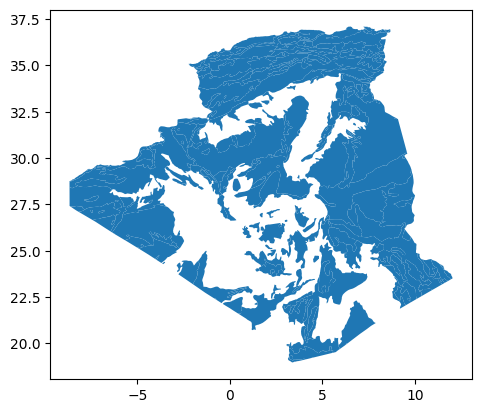

In [6]:
dzDf = geopd.GeoDataFrame(df, geometry='geometry')
dzDf.info()
dzDf.plot()

C:\Users\idirb\AppData\Local\Temp\ipykernel_10340\2608189426.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


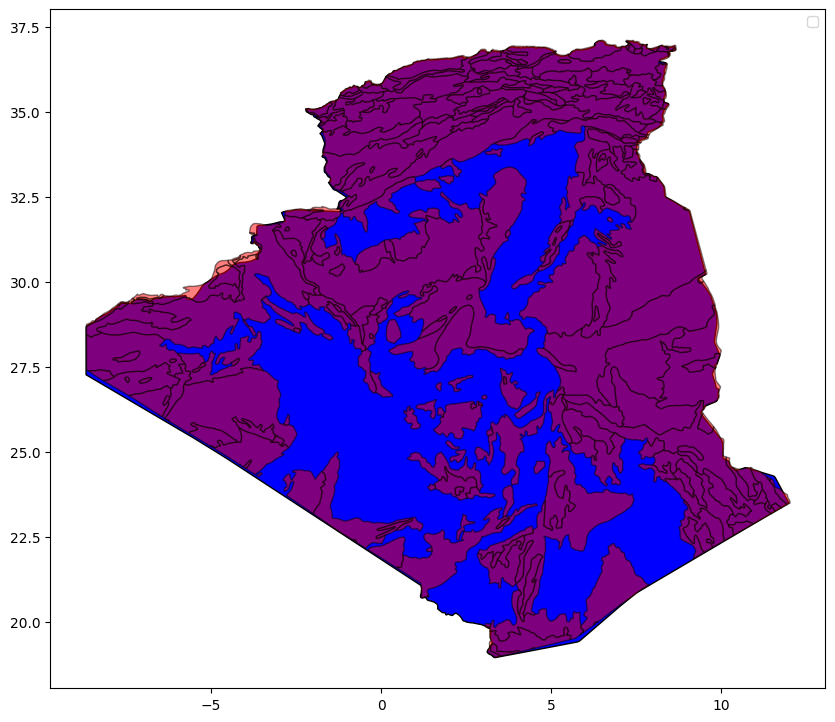

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# tizi de type geoDataFrame
geodf.plot(ax=ax, color="blue", edgecolor="black", label="geo_tizi")

# le df initiale avec que les données de la region de tizi ouzou
dzDf.plot(ax=ax, color="red", edgecolor="black", alpha=0.5, label="Intersecte")


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())


plt.show()

In [8]:
dzDf

,CNT_FULLNAME,sand % topsoil,sand % subsoil,silt % topsoil,silt% subsoil,clay % topsoil,clay % subsoil,pH water topsoil,pH water subsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,BS % topsoil,BS % subsoil,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,ALGERIA,49.570,43.090,28.200,24.200,22.230,32.710,5.860,5.390,2.4110,0.7420,0.1150,0.0610,72.50,63.20,6.890,12.420,21.50,35.8,0.030,0.090,1.780,1.780,20.8,12.10,"POLYGON ((5.48827 36.69035, 5.49893 36.69721, ..."
1,ALGERIA,56.970,55.060,21.440,19.190,21.690,25.680,5.920,6.020,1.0460,0.5500,0.1150,0.0710,81.00,81.70,15.000,17.380,66.50,61.4,0.760,0.830,1.190,1.320,9.7,8.00,"POLYGON ((7.27711 37.02901, 7.27423 37.03059, ..."
2,ALGERIA,57.390,55.210,24.315,22.825,18.295,21.965,6.270,5.750,1.2295,0.3905,0.0565,0.0280,69.90,53.50,8.080,8.325,20.45,26.1,0.035,0.035,1.690,1.690,18.7,13.00,"POLYGON ((7.36788 36.95551, 7.28063 36.93876, ..."
3,ALGERIA,20.410,24.080,32.930,29.190,46.620,46.690,7.860,8.030,0.6790,0.3820,0.0870,0.0480,98.60,99.30,39.480,37.910,74.20,71.0,6.330,6.770,1.540,1.580,9.3,9.60,"POLYGON ((7.68118 36.97944, 7.70461 36.97893, ..."
4,ALGERIA,31.420,28.460,21.650,20.520,46.890,50.950,7.320,7.490,0.6190,0.4240,0.0870,0.0570,92.90,93.60,36.420,36.980,72.10,69.8,1.950,2.720,1.540,1.670,9.0,8.70,"POLYGON ((8.66404 36.89446, 8.65727 36.89321, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,ALGERIA,32.208,32.934,17.523,18.216,16.335,14.817,4.620,4.719,0.5907,0.4752,0.0858,0.0495,51.81,59.07,9.009,6.468,34.98,23.1,1.320,0.693,0.726,0.792,6.6,4.95,"POLYGON ((3.22765 19.95354, 3.22437 19.9495, 3..."
291,ALGERIA,49.200,42.400,26.000,27.900,24.800,29.300,7.700,7.800,0.3300,0.2300,0.1000,0.0600,96.00,96.00,8.700,7.900,66.00,50.0,13.100,22.100,1.500,1.400,8.0,11.00,"POLYGON ((5.54115 19.48434, 4.50532 19.23282, ..."
292,ALGERIA,23.305,20.080,13.000,13.860,13.695,15.880,3.835,3.880,0.2035,0.1300,0.0475,0.0345,47.45,47.40,6.030,5.610,33.75,26.2,6.060,10.280,0.760,0.720,5.0,5.25,"POLYGON ((5.96119 19.71068, 5.85655 19.63617, ..."
293,ALGERIA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.00,"POLYGON ((4.10733 19.1358, 3.80858 19.0636, 3...."


In [9]:
dzDf.to_csv('../Data/processedData/soil_dz.csv', index=False)

In [10]:
from netCDF4 import Dataset

import geopandas as geopd


In [12]:
import xarray as xr
import os


def dz_nc(input_file, output_file, dz_bounds):

    # Open the NetCDF file with xarray
    ds = xr.open_dataset(input_file)


    

    # Define longitude and latitude bounds
    
    lon_min, lon_max = dz_bounds[0], dz_bounds[2]
    lat_min, lat_max = dz_bounds[1], dz_bounds[3]
    
    ds_subset = ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))


    ds_subset.to_netcdf(output_file)
    
    print(f" dataset saved to {output_file}")

input_folder = '../Data/Climate-DATA/'
output_folder = '../Data/processedData/climate-data/'

os.makedirs(output_folder, exist_ok=True)

for name_file in os.listdir(input_folder):
    input_file_path = os.path.join(input_folder, name_file)

    if os.path.isfile(input_file_path) and name_file.endswith('.nc'):
        new_name_file = f"dz_{name_file}"
        output_file_path = os.path.join(output_folder, new_name_file)

        dz_nc(input_file_path, output_file_path, dz_bounds)

 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201901_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201902_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201903_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201904_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201905_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201906_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201907_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201908_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201909_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201910_v2.1.nc
 dataset saved to ../Data/processedData/climate-data/dz_PSurf_WFDE5_CRU_201911_v2.1.nc
 dataset saved to ../Data/processedData/cli

In [11]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
import rioxarray
from shapely.geometry import Polygon, mapping
from shapely.wkt import loads


In [20]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
import rioxarray
from shapely.geometry import Polygon, mapping
from shapely.wkt import loads
from typing import List
from pathlib import Path

def extract_psurf_for_regions(csv_file: str, netcdf_files: List[str]):
    """
    Extrait les données Psurf de plusieurs fichiers NetCDF pour chaque région 
    et les combine avec le CSV existant
    
    Parameters:
    -----------
    csv_file : str
        Chemin vers le fichier CSV contenant les données des régions
    netcdf_files : List[str]
        Liste des chemins vers les fichiers NetCDF contenant les données Psurf
    
    Returns:
    --------
    GeoDataFrame
        DataFrame contenant les données originales plus les moyennes Psurf
    """
    
    df = pd.read_csv(csv_file)
    
    df['geometry'] = df['geometry'].apply(loads)
    
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
    
    all_psurf_means = {Path(f).stem: [] for f in netcdf_files}
    
    
    for nc_file in netcdf_files:
        file_name = Path(nc_file).stem
        print(f"\nTraitement du fichier: {file_name}")
        
        ds = xr.open_dataset(nc_file)
        
        # Vérification des noms des variables dans le dataset
        print("Variables disponibles:", list(ds.variables))
        
        # Utiliser le bon nom de variable (PSurf ou psurf)
        psurf_var = 'PSurf' if 'PSurf' in ds else 'psurf'
        psurf = ds[psurf_var]
        
        # Vérification des noms des dimensions
        print("Dimensions disponibles:", list(psurf.dims))
        
        # Utiliser les bons noms de dimensions pour longitude et latitude
        lon_name = 'lon' if 'lon' in psurf.dims else 'longitude'
        lat_name = 'lat' if 'lat' in psurf.dims else 'latitude'
        
        # ajouter les coordonnées spatiales au dataset
        psurf = psurf.rio.set_spatial_dims(x_dim=lon_name, y_dim=lat_name)
        psurf.rio.write_crs("EPSG:4326", inplace=True)
        
        #calcul de la moyenne Psurf pour chaque polygone
        for idx, row in gdf.iterrows():
            try:
                # clipper les données pour le polygone actuel
                clipped = psurf.rio.clip([mapping(row.geometry)], "EPSG:4326")
                # calculer la moyenne pour ce polygone
                mean_value = float(clipped.mean().values)
                all_psurf_means[file_name].append(mean_value)
            except Exception as e:
                print(f"Erreur pour l'index {idx} dans {file_name}: {e}")
                all_psurf_means[file_name].append(np.nan)
        
        ds.close()  

    for file_name, means in all_psurf_means.items():
        column_name = f'psurf_{file_name}'
        gdf[column_name] = means
    
    # calculer la moyenne globale sur tous les fichiers si nécessaire
    if len(netcdf_files) > 1:
        psurf_columns = [col for col in gdf.columns if col.startswith('psurf_')]
        gdf['psurf_mean'] = gdf[psurf_columns].mean(axis=1)
    
    # Sauvegarder le résultat
    output_file = 'soil_dz_tizi_with_psurf.csv'
    gdf.to_csv(output_file, index=False)
    
    return gdf

In [12]:
import xarray as xr
import numpy as np
import os
def calculate_matrix_avg(input_files):
    matrix_avg_list = []
    lat = lon = None  # Initialize lat and lon to capture coordinates

    for input_file in input_files:
        ds = xr.open_dataset(input_file)

        # Capture latitude and longitude coordinates from the dataset
        if lat is None or lon is None:
            lat = ds.coords['lat']
            lon = ds.coords['lon']

        matrix_list = []
        for i, t in enumerate(ds.time):
            # Selecting only the data variable without stacking
            single_time_ds = ds.sel(time=t)
            matrix_np = single_time_ds.to_array().isel(variable=0).values  # Selecting the first variable explicitly
            matrix_list.append(matrix_np)

        stacked_matrices = np.stack(matrix_list, axis=0)
        average_matrix = np.mean(stacked_matrices, axis=0)
        matrix_avg_list.append(average_matrix)

    stacked_avg_matrices = np.stack(matrix_avg_list, axis=0)
    avg_matrices = np.mean(stacked_avg_matrices, axis=0)

    # Create an xarray DataArray to include lat/lon coordinates
    avg_matrix_da = xr.DataArray(
        avg_matrices,
        coords={'lat': lat, 'lon': lon},
        dims=['lat', 'lon']
    )
    return avg_matrix_da


def season_matrices_avg(input_folder, output_folder, season, metric):
    input_files = []
    if season.lower() == 'winter':
        print('winter')
        for name_file in os.listdir(input_folder):
            input_file_path = os.path.join(input_folder, name_file)
            if metric.lower() in name_file.lower() and ('201912' in input_file_path or '201901' in input_file_path or '201902' in input_file_path):
                input_files.append(input_file_path)
    elif season.lower() == 'autumn':
        print('autumn')
        for name_file in os.listdir(input_folder):
            input_file_path = os.path.join(input_folder, name_file)
            if metric.lower() in name_file.lower() and ('201911' in input_file_path or '201910' in input_file_path or '201909' in input_file_path):
                input_files.append(input_file_path)
    elif season.lower() == 'spring':
        print('spring')
        for name_file in os.listdir(input_folder):
            input_file_path = os.path.join(input_folder, name_file)
            if metric.lower() in name_file.lower() and ('201903' in input_file_path or '201904' in input_file_path or '201905' in input_file_path):
                input_files.append(input_file_path)
    elif season.lower() == 'summer':
        print('summer')
        for name_file in os.listdir(input_folder):
            input_file_path = os.path.join(input_folder, name_file)
            if metric.lower() in name_file.lower() and ('201908' in input_file_path or '201907' in input_file_path or '201906' in input_file_path):
                input_files.append(input_file_path)
    else:
        print('invalid season')

    avg_matrix_da = calculate_matrix_avg(input_files)
    new_name_file = f"dz_{metric}_{season}.nc"
    output_file_path = os.path.join(output_folder, new_name_file)

    # Save the DataArray as a NetCDF file, preserving lat/lon coordinates
    avg_matrix_da.to_netcdf(output_file_path)

In [34]:
seasons = ['autumn', 'winter', 'spring', 'summer']
metrics = ['PSurf', 'Qair', 'Rainf',  'Snowf', 'Tair', 'Wind']

input_folder= '../Data/processedData/climate-data/'
output_folder= '../Data/processedData/climate-data/seasons/'
os.makedirs(output_folder, exist_ok=True)

for metric in metrics:
    for season in seasons:
        season_matrices_avg(input_folder, output_folder, season, metric)

autumn
winter
spring
summer


PermissionError: [Errno 13] Permission denied: 'c:\\Users\\idirb\\OneDrive\\Bureau\\projet-dm\\part1_dm\\Data\\processedData\\climate-data\\seasons\\dz_PSurf_summer.nc'

In [31]:
def create_col(nc_file, csv_file):
    ds = xr.open_dataset(nc_file)
    df = pd.read_csv(csv_file)
    psurf_values = []
    for idx, row in df.iterrows():
        pol = wkt.loads(row['geometry'])
        bounds = pol.bounds
        lon_min, lat_min, lon_max, lat_max = bounds
    
    # Sélectionnez les données qui correspondent au polygone
        ds_sub = ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    
    # Si des données sont trouvées, prenez la moyenne
        if len(ds_sub['__xarray_dataarray_variable__']) > 0:
            psurf = ds_sub['__xarray_dataarray_variable__'].mean().values
        else:
            psurf = float('nan')
    
        psurf_values.append(psurf)
    variable_name = os.path.basename(nc_file).split('.')[0].split('_', 1)[1]
    df[variable_name] = psurf_values
    return df

In [32]:
create_col('../Data/processedData/climate-data/seasons/dz_PSurf_summer.nc', '../Data/processedData/soil_dz.csv')

,CNT_FULLNAME,sand % topsoil,sand % subsoil,silt % topsoil,silt% subsoil,clay % topsoil,clay % subsoil,pH water topsoil,pH water subsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,BS % topsoil,BS % subsoil,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry,PSurf_summer
0,ALGERIA,49.570,43.090,28.200,24.200,22.230,32.710,5.860,5.390,2.4110,0.7420,0.1150,0.0610,72.50,63.20,6.890,12.420,21.50,35.8,0.030,0.090,1.780,1.780,20.8,12.10,"POLYGON ((5.488269805908203 36.69034957885742,...",96928.375
1,ALGERIA,56.970,55.060,21.440,19.190,21.690,25.680,5.920,6.020,1.0460,0.5500,0.1150,0.0710,81.00,81.70,15.000,17.380,66.50,61.4,0.760,0.830,1.190,1.320,9.7,8.00,"POLYGON ((7.277111053466797 37.02900695800781,...",NaN
2,ALGERIA,57.390,55.210,24.315,22.825,18.295,21.965,6.270,5.750,1.2295,0.3905,0.0565,0.0280,69.90,53.50,8.080,8.325,20.45,26.1,0.035,0.035,1.690,1.690,18.7,13.00,POLYGON ((7.367879867553711 36.955509185791016...,NaN
3,ALGERIA,20.410,24.080,32.930,29.190,46.620,46.690,7.860,8.030,0.6790,0.3820,0.0870,0.0480,98.60,99.30,39.480,37.910,74.20,71.0,6.330,6.770,1.540,1.580,9.3,9.60,"POLYGON ((7.681180000305176 36.97943878173828,...",99366.29
4,ALGERIA,31.420,28.460,21.650,20.520,46.890,50.950,7.320,7.490,0.6190,0.4240,0.0870,0.0570,92.90,93.60,36.420,36.980,72.10,69.8,1.950,2.720,1.540,1.670,9.0,8.70,"POLYGON ((8.664039611816406 36.89445877075195,...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,ALGERIA,32.208,32.934,17.523,18.216,16.335,14.817,4.620,4.719,0.5907,0.4752,0.0858,0.0495,51.81,59.07,9.009,6.468,34.98,23.1,1.320,0.693,0.726,0.792,6.6,4.95,POLYGON ((3.2276499271392822 19.95354080200195...,NaN
278,ALGERIA,49.200,42.400,26.000,27.900,24.800,29.300,7.700,7.800,0.3300,0.2300,0.1000,0.0600,96.00,96.00,8.700,7.900,66.00,50.0,13.100,22.100,1.500,1.400,8.0,11.00,"POLYGON ((5.541150093078613 19.48434066772461,...",95467.06
279,ALGERIA,23.305,20.080,13.000,13.860,13.695,15.880,3.835,3.880,0.2035,0.1300,0.0475,0.0345,47.45,47.40,6.030,5.610,33.75,26.2,6.060,10.280,0.760,0.720,5.0,5.25,"POLYGON ((5.961190223693848 19.71068000793457,...",NaN
280,ALGERIA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.00,POLYGON ((4.107329845428467 19.135799407958984...,95671.45


#### b. Provide a global description of the dataset.

#### c. Update/Delete an instance or value of the dataset.

## B. Analysis of characteristics 

#### a. Foreach attribute:

##### i. Calculate measures of central tendency and deduce symmetries

##### ii. Calculate measures of dispersion and deduce outliers

##### iii. Calculate the amount of missing values and unique values

##### iv. Construct boxplots and display outliers


##### v. Construct histograms and visualize the data distribution

#### b. Construct and display scatter plots of the data and deduce correlations

# INTERFACE

## C. Datareduction through aggregation by seasons

## D. Dataintegration: merges data from multiple sources into a single coherent dataset

## E. Multiple choices of handling outliers and missing values

## F. Datanormalization: Min-Max / z-score methods

## G. Datareduction via discretization of continuous data: Equal Frequency / Amplitude

## H. Datareduction (elimination of redundancies) horizontal / vertical